In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [345]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [346]:
train.shape


(1460, 81)

In [347]:
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [348]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Analyzing the target variable

In [349]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [350]:
# Now the normal distribution fits it perfectly!

In [351]:
# Checking numerical data
train.select_dtypes(include=['int64','float64']).columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [352]:
lennum=len(train.select_dtypes(include=['int64','float64']).columns)
lennum
# total 38 columns are numerical

38

In [353]:
# Checking categorical data
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [354]:
lencat=len(train.select_dtypes(include=['object']).columns)
lencat
# remaining 43 columns are categorical

43

Checking the correlations between the features and the target variable

<AxesSubplot:>

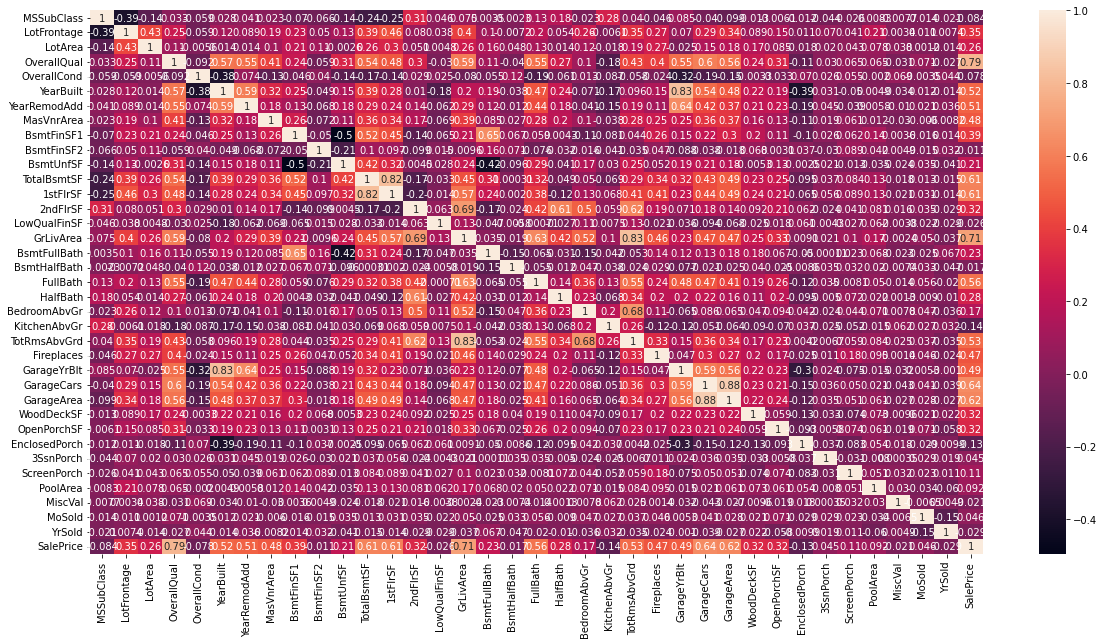

In [355]:

train.drop(['Id'],axis='columns',inplace=True)
test.drop(['Id'],axis='columns',inplace=True)

corrmat=train.corr()
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,annot=True)

<AxesSubplot:>

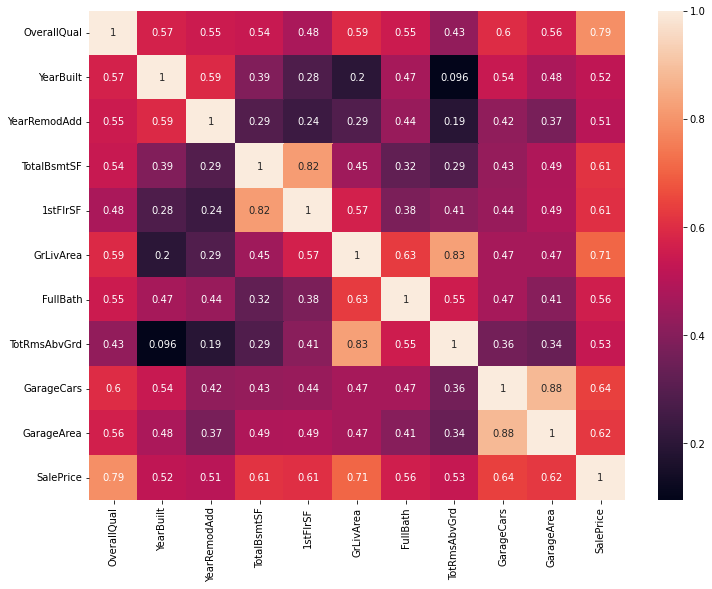

In [356]:
# We will obtain the top 50% related features
top_feature=corrmat.index[abs(corrmat['SalePrice']>0.5)]
plt.subplots(figsize=(12,9))
top_corrmat=train[top_feature].corr()
sns.heatmap(top_corrmat,annot=True)

In [357]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [358]:
# All the top 50% percent correlated features were related positively. None of the numerical features is strongly negatively correlated

Removing outliers in these strongly correlated features

In [359]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

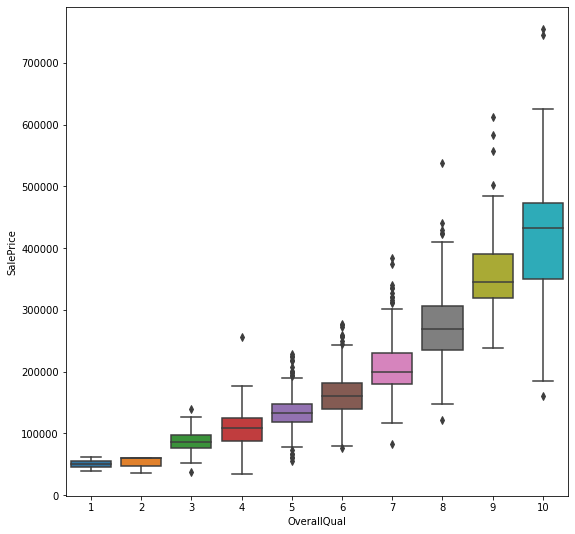

In [360]:
# First OverallQual vs SalePrice
plt.figure(figsize=(9,9))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)
# No significant outliers detected

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

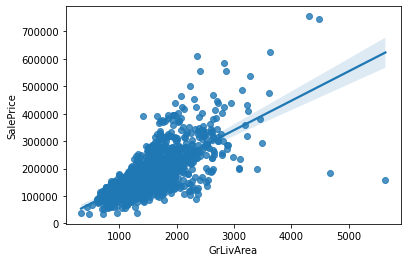

In [361]:
# For the second most related feature-GarlivArea
sns.regplot(x=train.GrLivArea,y=train.SalePrice)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

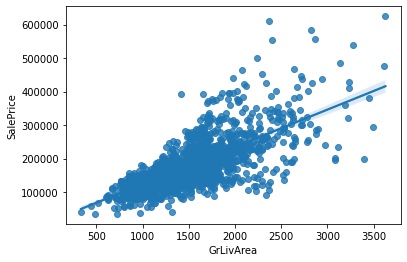

In [362]:
# the bottom two points seems to be outlier we will remove them
train=train.drop(train[(train['GrLivArea']>4000) &(train['SalePrice']<3000000)].index)
sns.regplot(x=train.GrLivArea,y=train.SalePrice)

In [363]:
# GarageCars vs Saleprice
train['GarageCars'].unique()

array([2, 3, 1, 0, 4])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

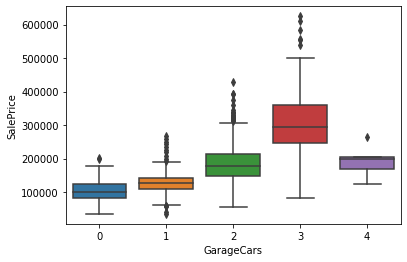

In [364]:
sns.boxplot(x=train['GarageCars'],y=train['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

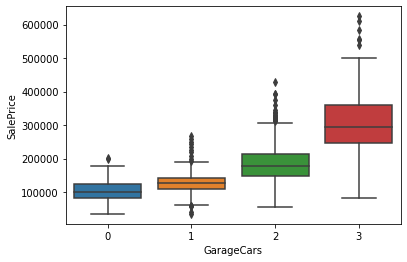

In [365]:
# For the Garage with 4 cars the SalePrice is way lesser than that of 3 which hints that this may be a outlier.So, we will remove this
train=train.drop(train[train['GarageCars']==4].index)
sns.boxplot(x=train['GarageCars'],y=train['SalePrice'])

In [366]:
# GarageArea vs SalePrice
train['GarageArea'].unique()

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  795,  856,  473,  398,  500,  349,  454,  644,  299,
        210,  431,  438,  675,  968,  721,  336,  810,  494,  457,  818,
        463,  604,  389,  538,  520,  309,  429,  6

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

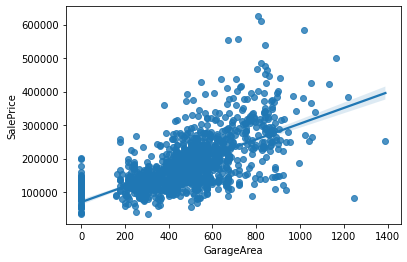

In [367]:
sns.regplot(x=train['GarageArea'],y=train['SalePrice'])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

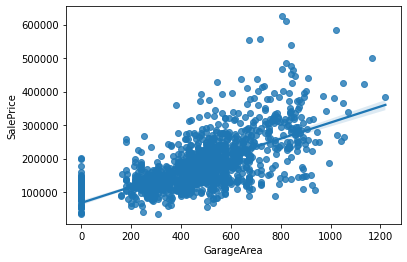

In [368]:
# bottom two points seems to be outlier so we will remove them
train = train.drop(train[(train['GarageArea']>1200) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)
sns.regplot(x=train['GarageArea'],y=train['SalePrice'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

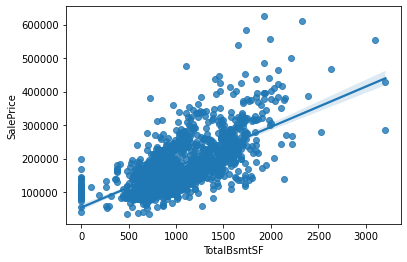

In [369]:
# TotalBsmtSF(basement area) vs SalePrice
sns.regplot(x=train['TotalBsmtSF'],y=train['SalePrice'])
# No significant outliers

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

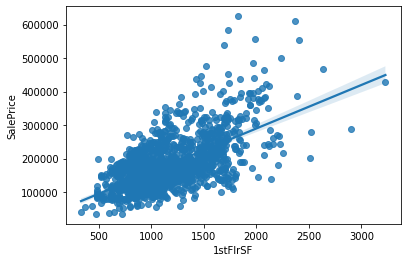

In [370]:
# 1stFlrSF (First Floor Area) vs Sale Price
sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'])
# No outliers 

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

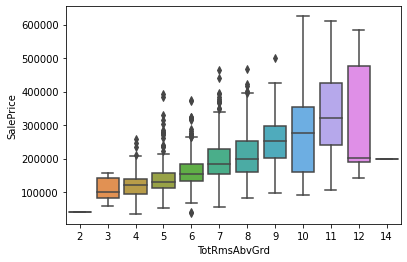

In [371]:
# Total Rooms vs Sale Price
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])
# No outliers

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

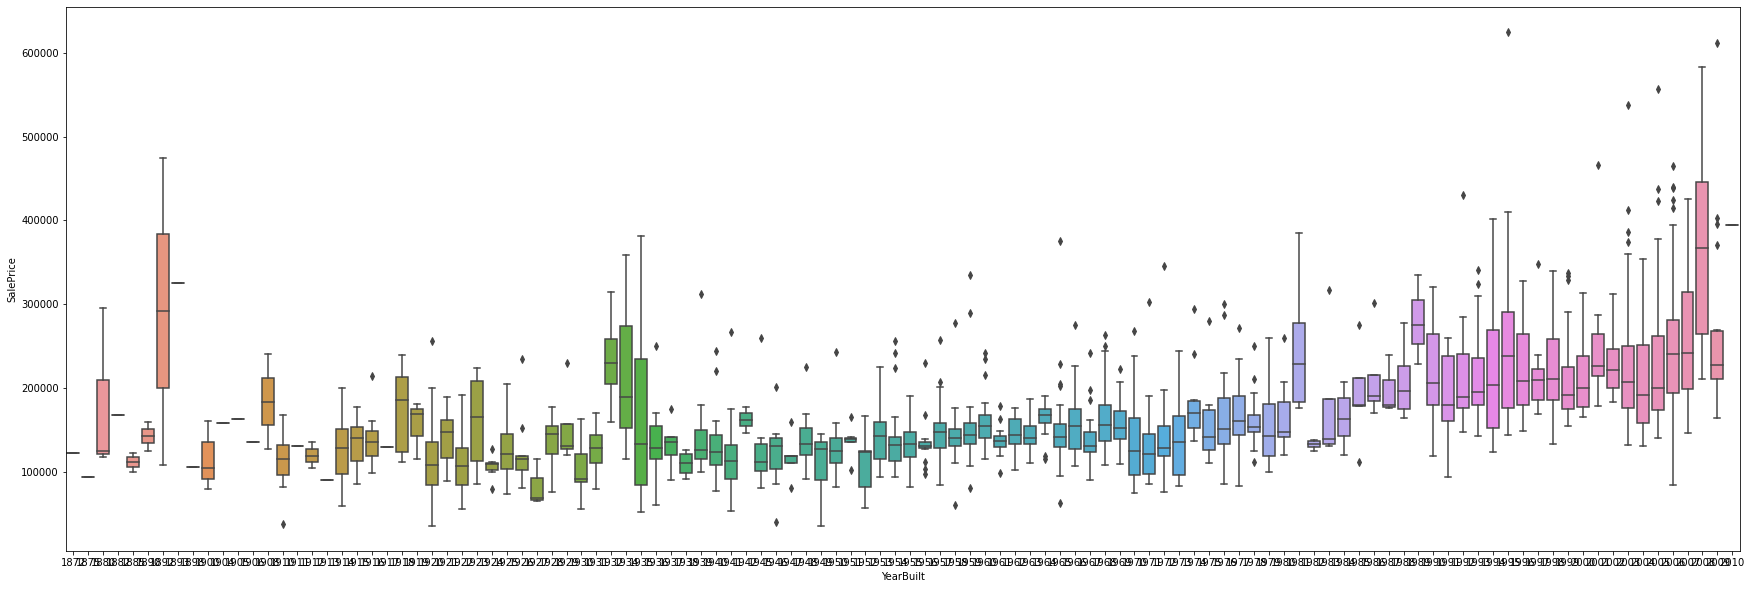

In [372]:
plt.figure(figsize=(30,10))
sns.boxplot(x=train['YearBuilt'], y=train["SalePrice"])
# No outliers

In [373]:
train['FullBath'].unique()

array([2, 1, 3, 0])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

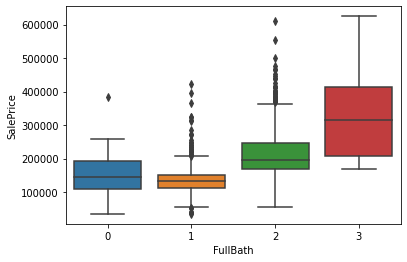

In [374]:
sns.boxplot(x=train['FullBath'],y=train['SalePrice'])
# No outliers detected

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

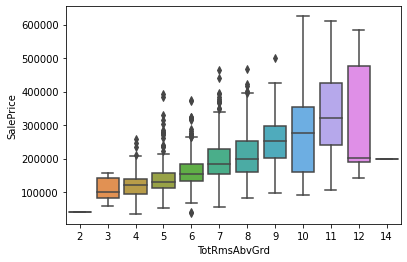

In [375]:
# TotRmsAbvGrd vs Saleprice
sns.boxplot(x=train['TotRmsAbvGrd'],y=train['SalePrice'])
# No outliers detected

Handling Missing values

In [376]:
train.columns[train.isnull().any()]
# Printing the columns with missing values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

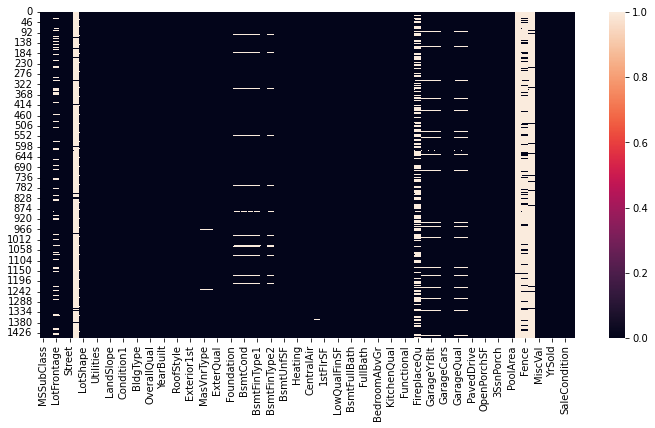

In [377]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [378]:

train.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1445,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1446,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1447,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [379]:
# we will comine both train and test dataset together to impute the missing values together
y = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2904,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2905,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2906,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [380]:
# Finding the missing ratio of each dataset
data_miss = (data.isnull().sum() / len(data)) * 100
data_miss = data_miss.sort_values(ascending=False)
data_miss=data_miss.drop(data_miss[data_miss==0].index)
data_miss

PoolQC          99.724897
MiscFeature     96.423659
Alley           93.225585
Fence           80.433287
FireplaceQu     48.693260
LotFrontage     16.678129
GarageCond       5.467675
GarageQual       5.467675
GarageYrBlt      5.467675
GarageFinish     5.467675
GarageType       5.398900
BsmtCond         2.819807
BsmtExposure     2.819807
BsmtQual         2.785420
BsmtFinType2     2.751032
BsmtFinType1     2.716644
MasVnrType       0.825309
MasVnrArea       0.790922
MSZoning         0.137552
BsmtHalfBath     0.068776
Utilities        0.068776
Functional       0.068776
BsmtFullBath     0.068776
BsmtFinSF2       0.034388
BsmtFinSF1       0.034388
Exterior2nd      0.034388
BsmtUnfSF        0.034388
TotalBsmtSF      0.034388
Exterior1st      0.034388
SaleType         0.034388
Electrical       0.034388
KitchenQual      0.034388
GarageArea       0.034388
GarageCars       0.034388
dtype: float64

Text(0, 0.5, 'Missing values by percentage')

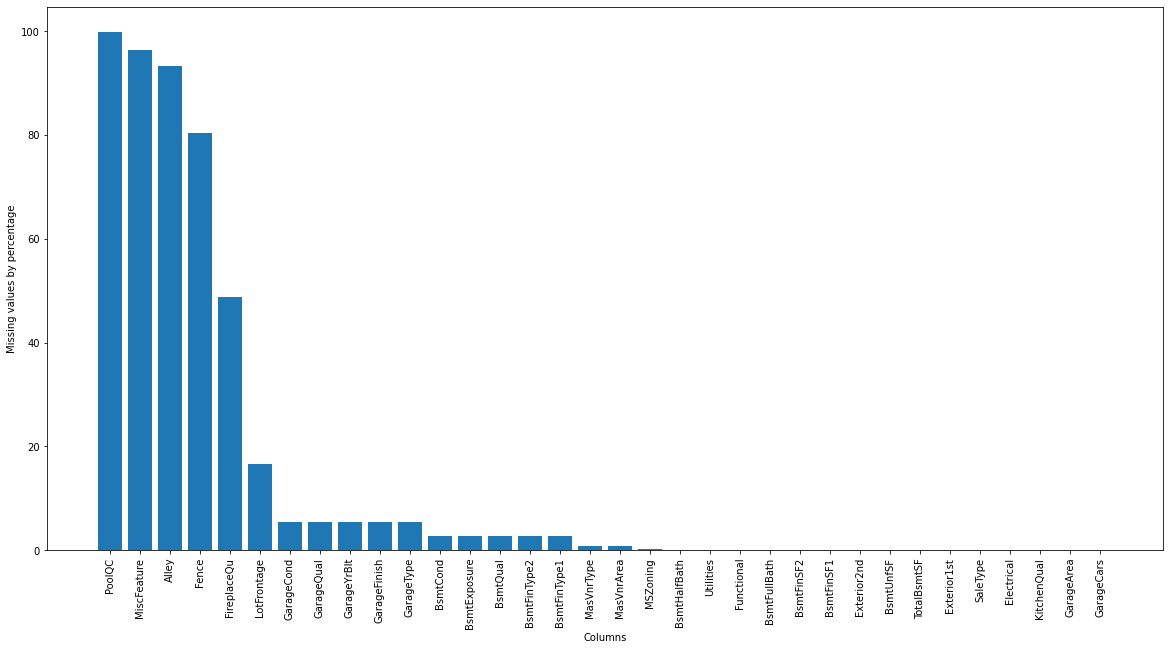

In [381]:
plt.figure(figsize=(20,10))
plt.bar(data_miss.index,height=data_miss)
_=plt.xticks(rotation='90')
plt.xlabel('Columns')
plt.ylabel('Missing values by percentage')

In [382]:
# Around 50% missing values has been filled by none
data['PoolQC'] = data['PoolQC'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [383]:
# LotFrontage Group by neighborhood and filling the  missing value by the median LotFrontage of all the neighborhood
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [384]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] =data[col].fillna('None')

In [385]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    data[col] = data[col].fillna('None')

In [386]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    data[col] = data[col].fillna(int(0))

In [387]:
#MasVnrArea : replace with zero
data['MasVnrArea'] = data['MasVnrArea'].fillna(int(0))

In [388]:
#MasVnrType : replace with None
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [389]:
# Filling these values by mode
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])


In [390]:
data["Functional"] = data["Functional"].fillna("Typ")

In [391]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
2904,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2905,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2906,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [392]:
data = data.drop(['Utilities'], axis=1)




In [393]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [394]:
# checking if any cloumn remained null
data.columns[data.isnull().any()]
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,6,2006,WD,Normal
2904,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2905,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2906,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


Feature Engineering

In [395]:
# Some features were categorical but interpreted as numerical
# they are
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data.shape

(2908, 78)

In [396]:
# These are the remaining categorical features  which have ordered values and  need to be encoded


from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    Enc = LabelEncoder() 
    Enc.fit(list(data[c].values)) 
    data[c] = Enc.transform(list(data[c].values))

      
data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,8,0,WD,Normal
2904,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,6,0,WD,Abnorml
2905,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,11,0,WD,Abnorml
2906,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,...,0,0,3,2,Shed,700,9,0,WD,Normal


Fixing Skewed Features

/home/adarsh/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

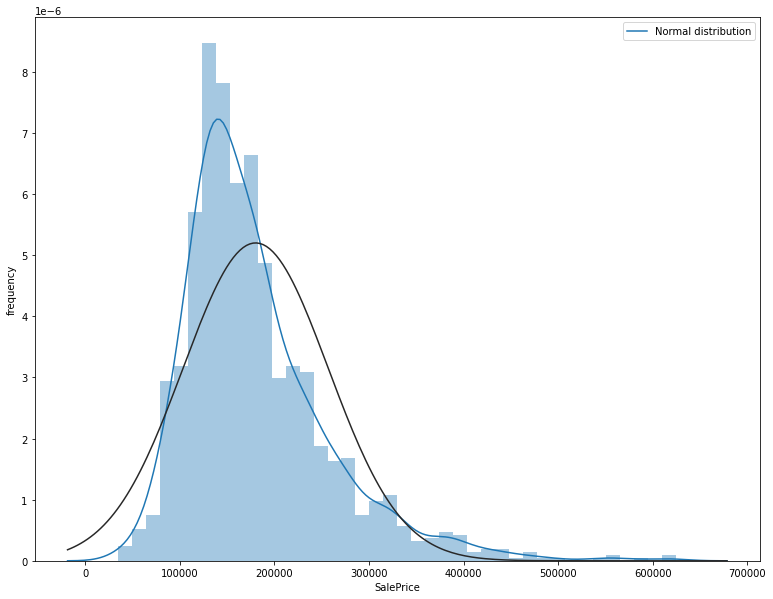

In [397]:
plt.subplots(figsize=(13,10))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu,sigma)=stats.norm.fit(train['SalePrice'])
plt.legend(['Normal distribution'], loc='best')
plt.ylabel('frequency')

/home/adarsh/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


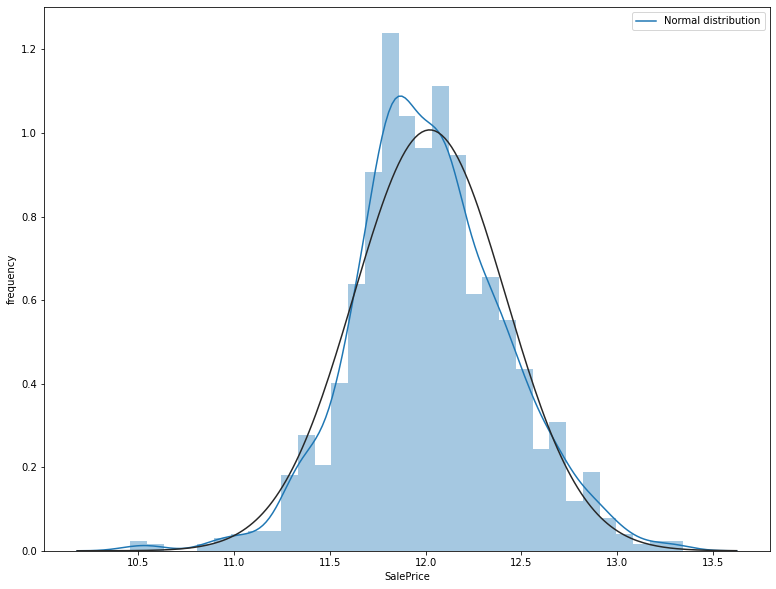

In [398]:
# the target variable seems to be right screwed 
# We can apply logarithm to make it a normal distribution
train['SalePrice']=np.log1p(train['SalePrice'])
plt.subplots(figsize=(13,10))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu,sigma)=stats.norm.fit(train['SalePrice'])
plt.legend(['Normal distribution'], loc='best')
plt.ylabel('frequency')
y=train.SalePrice.values

In [399]:

from scipy.stats import skew
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()


,Skewed Features
MiscVal,21.915535
PoolArea,18.679169
LotArea,13.168714
LowQualFinSF,12.065521
3SsnPorch,11.354131


In [400]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)
    data[feat] += 1


There are 58 skewed numerical features to Box Cox transform


In [401]:
data = pd.get_dummies(data)
print(data.shape)

(2908, 219)


In [402]:
train=data[:len(train)]
test=data[len(train):]

In [403]:
train.columns[data.isnull().any()]

Index([], dtype='object')

In [404]:
test

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1449,3.055642,7.221214,21.479373,1.730463,1.730463,2.540963,1.000000,3.055642,3.055642,15.121376,...,0,0,0,1,0,0,0,0,1,0
1450,3.055642,7.244956,22.327220,1.730463,1.730463,1.000000,1.000000,3.259674,3.055642,15.116605,...,0,0,0,1,0,0,0,0,1,0
1451,3.885846,7.073289,22.196905,1.730463,1.730463,1.000000,1.000000,3.055642,2.820334,15.178149,...,0,0,0,1,0,0,0,0,1,0
1452,3.885846,7.172972,20.865444,1.730463,1.730463,1.000000,1.000000,3.259674,3.055642,15.179714,...,0,0,0,1,0,0,0,0,1,0
1453,1.000000,6.093857,18.257255,1.730463,1.730463,1.000000,1.000000,3.602594,2.820334,15.170316,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2.194318,4.932510,15.081426,1.730463,1.730463,2.540963,1.000000,2.820334,3.259674,15.135652,...,0,0,0,1,0,0,0,0,1,0
2904,2.194318,4.932510,15.013314,1.730463,1.730463,2.540963,1.000000,2.820334,2.820334,15.135652,...,0,0,0,1,1,0,0,0,0,0
2905,3.055642,8.620056,23.782058,1.730463,1.730463,2.540963,1.000000,3.055642,3.259674,15.119786,...,0,0,0,1,1,0,0,0,0,0
2906,4.340760,6.744420,21.046557,1.730463,1.730463,2.540963,1.000000,3.055642,2.820334,15.170316,...,0,0,0,1,0,0,0,0,1,0


In [405]:

X=train

First we will scale our data

In [406]:
from sklearn.preprocessing import RobustScaler
RobustScaler().fit_transform(X)


array([[ 0.75423869, -0.25647644, -0.26297362, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24576131,  0.46996417,  0.03652568, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75423869, -0.10068914,  0.41689434, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.90539869, -0.20389036, -0.10474751, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24576131, -0.10068914,  0.06525894, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24576131,  0.24155736,  0.11850014, ...,  0.        ,
         0.        ,  0.        ]])

Linear Regression is used as a model

In [407]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
LR.fit(X_train,y_train)
LR.score(X_test,y_test)
# the score comes out to be very very less

-6.625726486517286e+17

Lasso Regression

In [408]:
from sklearn.linear_model import Lasso
L=Lasso(alpha=100,selection='random', random_state=1,max_iter=100000)
L.fit(X_train,y_train)
L.score(X_test,y_test)
# Lasso Regression has also performed very poorly

-6.74854577020767e-06

Random Forest Regressor

In [409]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(random_state=10)
# Using Radomized Search CV to determine the best parameter
params={'max_depth':[40,60,80], 'n_estimators':[1000,2000,3000]}
grid_RF=RandomizedSearchCV(estimator=RF, param_distributions=params,cv=2,n_jobs=-1)
grid_RF.fit(X,y)
grid_RF.best_params_

/home/adarsh/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 2000, 'max_depth': 40}

In [410]:
model = RandomForestRegressor(n_estimators=2000, max_depth=40)


model.fit(X_train, y_train)

#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  87.896571602952


GradientBoostingRegressor

In [411]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost=GradientBoostingRegressor(random_state=10)
parameters = {
                  
                  'n_estimators' : [1000,2000,3000],
                  'max_depth'    : [4,6,8]
                 }
grid_RF=RandomizedSearchCV(estimator=RF, param_distributions=params,cv=2,n_jobs=-1)
grid_RF.fit(X,y)
grid_RF.best_params_   

/home/adarsh/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 2000, 'max_depth': 40}

In [412]:
GBoost=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=5)
GBoost.fit(X_train,y_train)
GBoost.score(X,y)

0.9677779629198604

In [413]:
# Of all the method used above GradientBosstingRegression gave us the highest accuracy
# So, we will use that as our final model
model=GBoost
pred=GBoost.predict(test)
pred

array([11.74423795, 11.97939379, 12.15241603, ..., 12.00084683,
       11.61659761, 12.26790324])

In [414]:
#Since the target variable was applied by log(1+x) so to convert it back we multiply that by exp(pred)-1
pred=np.exp(pred)-1
pred

array([126024.29856486, 159434.35051671, 189550.49957737, ...,
       162891.67541197, 110922.6730046 , 212755.42317742])

In [415]:
a=np.arange(1461,2920)
result=pd.DataFrame({'Id':a, 'SalePrice':pred})
result
# the dataframe containing the SellingPrice of all the Ids in the test

,Id,SalePrice
0,1461,126024.298565
1,1462,159434.350517
2,1463,189550.499577
3,1464,187292.495720
4,1465,188974.376336
...,...,...
1454,2915,81513.019886
1455,2916,82684.712211
1456,2917,162891.675412
1457,2918,110922.673005


In [416]:
result.to_csv('submission.csv',index=False)